# Read historical NAV information from AMF website

https://www.amfiindia.com/nav-history-download

Sample Historical NAV download URL:
#http://portal.amfiindia.com/DownloadNAVHistoryReport_Po.aspx?mf=22&frmdt=19-Mar-2020&todt=19-Jun-2020

In [1]:
import numpy as np
import pandas as pd
from datetime import date

In [2]:
#Start date is w
start_date = date(2018,9,1)
curr_date = date.today()

In [7]:
#AMC List. Key is AMC code that is used in constructing URL. Value is AMC Name. 
AMC_list = {'3' : 'Aditya Birla Sun Life Mutual Fund',
            '9' : 'HDFC Mutual Fund',
            '17' : 'Kotak Mahindra Mutual Fund',
            '20' : 'ICICI Prudential Mutual Fund',
            '22' : 'SBI Mutual Fund',
            '27' : 'Franklin Templeton Mutual Fund',
            '45' : 'Mirae Asset Mutual Fund',
            '56' : 'L&T Mutual Fund'
           }

In [8]:
#Mutual Fund list. Key is Scheme Code in AMF extract. Value is Mutual Fund name as it is in Kuvera extract
MF_code_name_list = {'120705' : 'Aditya Birla Sun Life Regular Saving Growth Direct Plan',
                     '119016' : 'HDFC Short Term Debt Growth Direct Plan',
                     '120166' : 'Kotak Standard Multicap Growth Direct Plan',
                     '120586' : 'ICICI Prudential Bluechip Growth Direct Plan',
                     '120603' : 'ICICI Prudential All Seasons Bond Growth Direct Plan',
                     '119812' : 'SBI Magnum Low Duration Growth Direct Plan',
                     '119824' : 'SBI Magnum Medium Duration Growth Direct Plan',
                     '123169' : 'SBI Debt Series C 34 Growth Direct Plan',
                     '107249' : 'Franklin India Ultra Short Bond Super Institutional Growth Direct Plan',
                     '147973' : 'Franklin India Ultra Short Bond Super Institutional Segregated Portfolio 1 8 25% Vodafone Idea Ltd 10jul20 Growth Direct Plan',
                     '118825' : 'Mirae Asset Large Cap Growth Direct Plan',
                     '134813' : 'Mirae Asset Hybrid Equity Growth Direct Plan',
                     '119807' : 'L&T Midcap Growth Direct Plan'
                    }

In [9]:
#Extract only MF codes to apply filter on AMF response dataset
MF_list = list(MF_code_name_list.keys())
MF_list

['120705',
 '119016',
 '120166',
 '120586',
 '120603',
 '119812',
 '119824',
 '123169',
 '107249',
 '147973',
 '118825',
 '134813',
 '119807']

In [10]:
def get_nav_history(amc_code,start,end,MF_list):
    #http://portal.amfiindia.com/DownloadNAVHistoryReport_Po.aspx?mf=56&frmdt=19-Mar-2020&todt=19-Jun-2020'
    AMF_url = 'http://portal.amfiindia.com/DownloadNAVHistoryReport_Po.aspx?' + \
              'mf=' + \
              amc_code + \
              '&frmdt=' + \
              start + \
              '&todt=' + \
              end
            
    #print(AMF_url)
    #initialize Dataframe
    amc_hist_nav = pd.read_csv(AMF_url,sep=';')
    amc_hist_nav = amc_hist_nav.drop(['Repurchase Price','Sale Price'],axis=1)
    amc_hist_nav = amc_hist_nav[amc_hist_nav['Scheme Name'].notna()]
    amc_hist_nav = amc_hist_nav[amc_hist_nav['Scheme Code'].isin(MF_list)]
    return amc_hist_nav    

In [11]:
#initialize Dataframe
hist_nav = pd.DataFrame()
hist_nav = get_nav_history('56','19-Mar-2020','19-Jun-2020',MF_list)
hist_nav.head()

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Date
801,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,106.20,19-Mar-2020
802,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,110.48,20-Mar-2020
803,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,97.70,23-Mar-2020
804,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,97.82,24-Mar-2020
805,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,100.64,25-Mar-2020


In [12]:
len(hist_nav)

61

In [13]:
hist_nav[hist_nav['Scheme Code'] == '119807']

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Date
801,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,106.20,19-Mar-2020
802,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,110.48,20-Mar-2020
803,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,97.70,23-Mar-2020
804,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,97.82,24-Mar-2020
805,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,100.64,25-Mar-2020
806,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,104.22,26-Mar-2020
807,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,103.81,27-Mar-2020
808,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,101.92,30-Mar-2020
809,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,105.03,31-Mar-2020
810,119807,L&T Mid Cap Fund-Direct Plan-Growth,INF917K01FZ1,NaN,102.84,01-Apr-2020


In [14]:
df = pd.read_csv('http://portal.amfiindia.com/DownloadNAVHistoryReport_Po.aspx?mf=56&frmdt=19-Mar-2020&todt=19-Jun-2020',sep=';')

In [15]:
df.head()

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Repurchase Price,Sale Price,Date
0,Open Ended Schemes ( Equity Scheme - Multi Cap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L&T Mutual Fund,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.764,NaN,NaN,19-Mar-2020
3,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,23.831,NaN,NaN,20-Mar-2020
4,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,21.084,NaN,NaN,23-Mar-2020


In [16]:
df = df.drop(['Repurchase Price','Sale Price'],axis=1)

In [17]:
df.head()

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Date
0,Open Ended Schemes ( Equity Scheme - Multi Cap...,NaN,NaN,NaN,NaN,NaN
1,L&T Mutual Fund,NaN,NaN,NaN,NaN,NaN
2,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.764,19-Mar-2020
3,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,23.831,20-Mar-2020
4,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,21.084,23-Mar-2020


In [18]:
df[df['Scheme Name'].notna()]

,Scheme Code,Scheme Name,ISIN Div Payout/ISIN Growth,ISIN Div Reinvestment,Net Asset Value,Date
2,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.764,19-Mar-2020
3,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,23.831,20-Mar-2020
4,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,21.084,23-Mar-2020
5,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,21.338,24-Mar-2020
6,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.246,25-Mar-2020
7,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.863,26-Mar-2020
8,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.860,27-Mar-2020
9,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.285,30-Mar-2020
10,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,23.051,31-Mar-2020
11,119290,L&T Equity Fund-Direct Plan-Dividend,INF917K01FB2,INF917K01FA4,22.329,01-Apr-2020


In [78]:
df['date'].head(1)

0    24-06-2020
Name: date, dtype: object

In [74]:
df.head()

,date,nav,fund_house,scheme_type,scheme_category,scheme_code,scheme_name
0,24-06-2020,127.50000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
1,23-06-2020,128.31000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
2,22-06-2020,126.62000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
3,19-06-2020,125.10000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
4,18-06-2020,123.59000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth


In [41]:
import urllib
import json
response = urllib.request.urlopen('https://api.mfapi.in/mf/119807')
data = json.loads(response.read())
df = pd.DataFrame(data['data'])

In [51]:
data['meta']

{'fund_house': 'L&T Mutual Fund',
 'scheme_type': 'Open Ended Schemes',
 'scheme_category': 'Equity Scheme - Mid Cap Fund',
 'scheme_code': 119807,
 'scheme_name': 'L&T Mid Cap Fund-Direct Plan-Growth'}

In [63]:
for each_item in data['meta'].items():
    df[each_item[0]] = each_item[1]

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

DataError: No numeric types to aggregate

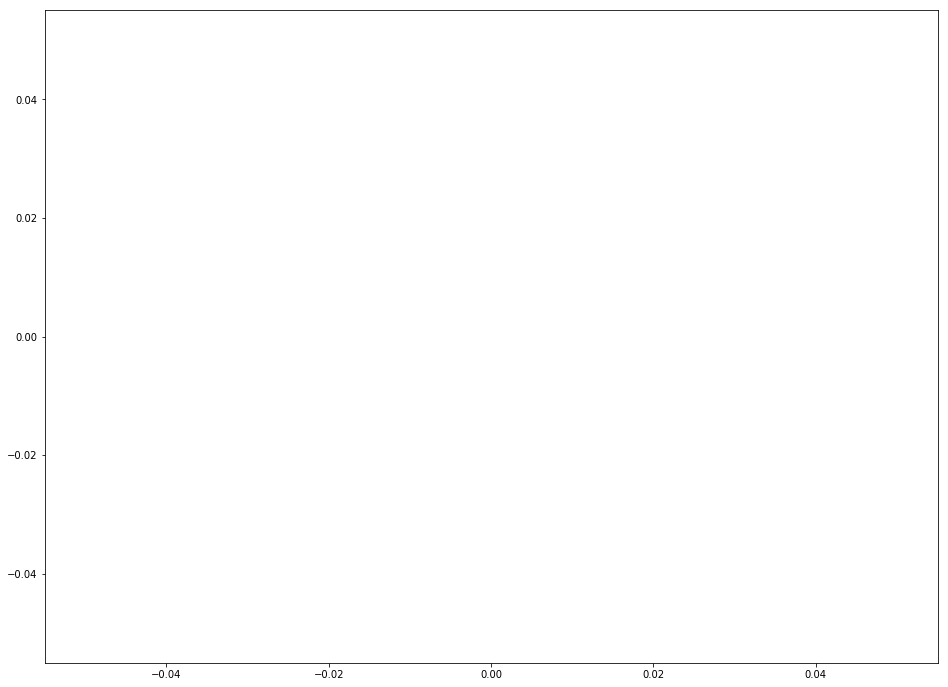

In [73]:
plt.figure(figsize=(16,12))
ax = sns.lineplot(x='date',y='nav',data=df)

In [64]:
df.head()

,date,nav,fund_house,scheme_type,scheme_category,scheme_code,scheme_name
0,24-06-2020,127.50000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
1,23-06-2020,128.31000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
2,22-06-2020,126.62000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
3,19-06-2020,125.10000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth
4,18-06-2020,123.59000,L&T Mutual Fund,Open Ended Schemes,Equity Scheme - Mid Cap Fund,119807,L&T Mid Cap Fund-Direct Plan-Growth


C:\Users\118472\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,date,fund_house,nav,scheme_category,scheme_code,scheme_name,scheme_type
0,24-06-2020,NaN,127.50000,NaN,NaN,NaN,NaN
1,23-06-2020,NaN,128.31000,NaN,NaN,NaN,NaN
2,22-06-2020,NaN,126.62000,NaN,NaN,NaN,NaN
3,19-06-2020,NaN,125.10000,NaN,NaN,NaN,NaN
4,18-06-2020,NaN,123.59000,NaN,NaN,NaN,NaN
5,17-06-2020,NaN,122.40000,NaN,NaN,NaN,NaN
6,16-06-2020,NaN,121.89000,NaN,NaN,NaN,NaN
7,15-06-2020,NaN,121.67000,NaN,NaN,NaN,NaN
8,12-06-2020,NaN,122.73000,NaN,NaN,NaN,NaN
9,11-06-2020,NaN,121.99000,NaN,NaN,NaN,NaN
